# Regression Assignment
I want you to practice some regression and analyzing your results. Utilize this document to load data directly.

# Linear Regression
Fit goals vs points in a linear regression. Fit a multiple regression on goals and assists vs points. What do you notice about these two fits.   https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

The single regression using only goals to predict points gives a reasonable fit, but it doesn’t capture all the variation in points because it ignores assists. The multiple regression, which includes both goals and assists, fits the data almost perfectly. This makes sense because a player’s total points are actually the sum of their goals and assists. So, adding assists as a predictor greatly improves the accuracy of the model, showing that including all relevant variables gives a much better prediction.

Single Regression (Goals vs Points):
Slope: 2.1767804545225657 Intercept: 3.73724315960391 R^2: 0.8461669386312142


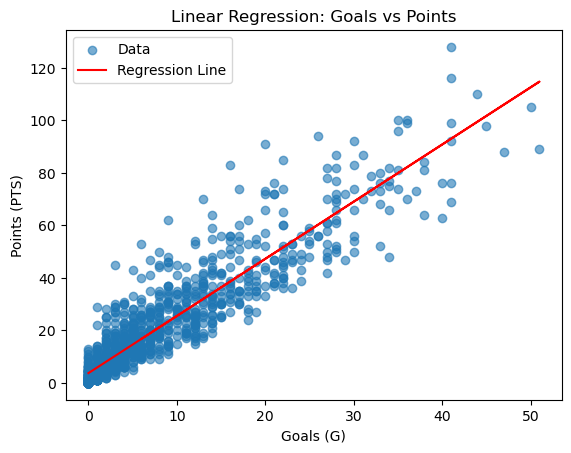


Multiple Regression (Goals + Assists vs Points):
Coefficients: [1. 1.] Intercept: -1.0658141036401503e-14 R^2: 1.0


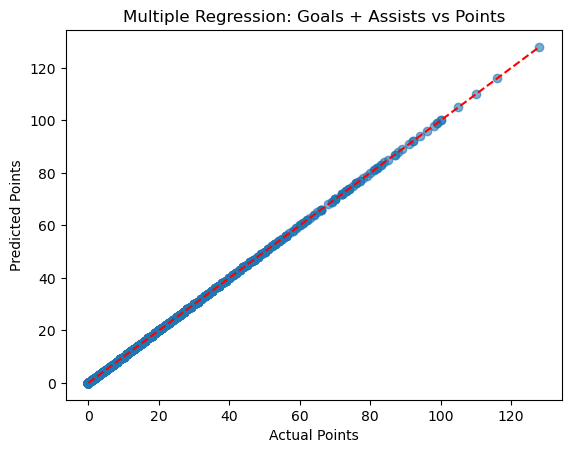

In [17]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load hockey dataset
df_hockey = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

# Single regression: Goals vs Points
X1 = df_hockey[['G']]
y = df_hockey['PTS']
lin1 = LinearRegression().fit(X1, y)

print("Single Regression (Goals vs Points):")
print("Slope:", lin1.coef_[0], "Intercept:", lin1.intercept_, "R^2:", lin1.score(X1, y))

# Plot single regression
plt.scatter(df_hockey['G'], y, alpha=0.6, label="Data")
plt.plot(df_hockey['G'], lin1.predict(X1), color="red", label="Regression Line")
plt.xlabel("Goals (G)")
plt.ylabel("Points (PTS)")
plt.title("Linear Regression: Goals vs Points")
plt.legend()
plt.show()

# Multiple regression: Goals + Assists vs Points
X2 = df_hockey[['G','A']]
lin2 = LinearRegression().fit(X2, y)

print("\nMultiple Regression (Goals + Assists vs Points):")
print("Coefficients:", lin2.coef_, "Intercept:", lin2.intercept_, "R^2:", lin2.score(X2, y))

# Plot predicted vs actual for multiple regression
y_pred_multi = lin2.predict(X2)
plt.scatter(y, y_pred_multi, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Multiple Regression: Goals + Assists vs Points")
plt.show()


# Logistic Regression
Using the 538 Avengers dataset, https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict Death1 (first time a character might die) based on whatever variables you find interesting. Make a prediction using probabilities on your favorite character.

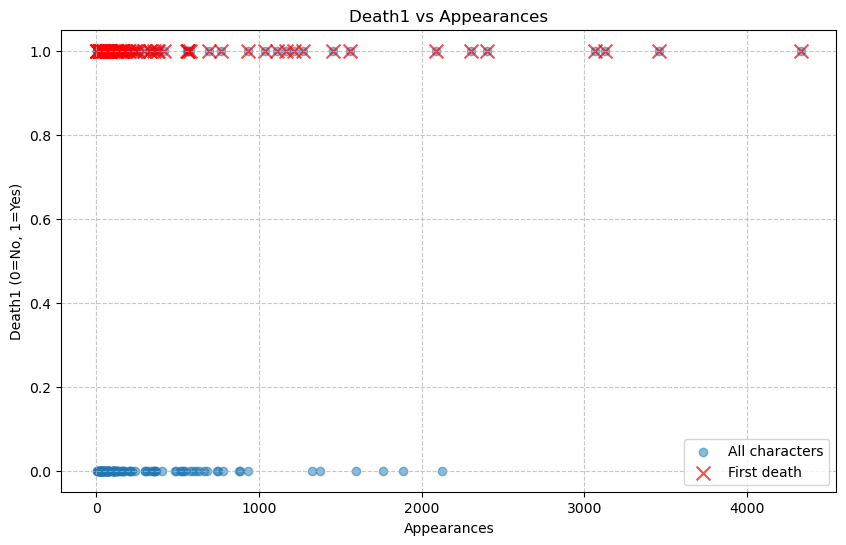

Character not found.
Probability that Thor Odinson dies (Death1=YES): 0.71
Probability that Janet van Dyne dies (Death1=YES): 0.49


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')

# Encoding Death1 as 0/1
df['Death1_bin'] = df['Death1'].map({'YES': 1, 'NO': 0})

# Encode Gender as numeric
le = LabelEncoder()
df['Gender_bin'] = le.fit_transform(df['Gender'])

# Calculate Age (current year - Year)
current_year = 2025
df['Age'] = current_year - df['Year']

# Selecting features and target 
X = df[['Appearances', 'Gender_bin', 'Age', 'Year']]  
y = df['Death1_bin']                              

# Fit logistic regression 
model = LogisticRegression()
model.fit(X, y)

# Scatter plot for visualization with first death highlighted
plt.figure(figsize=(10,6))

# Plot all points
plt.scatter(df['Appearances'], df['Death1_bin'], alpha=0.5, label='All characters')

# Highlight characters with Death1 = YES
death_chars = df[df['Death1_bin'] == 1]
plt.scatter(death_chars['Appearances'], death_chars['Death1_bin'], 
            color='red', alpha=0.7, s=100, marker='x', label='First death')

plt.xlabel('Appearances')
plt.ylabel('Death1 (0=No, 1=Yes)')
plt.title('Death1 vs Appearances')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Function to predict Death1 probability using all features
def predict_death(character_name):
    # Find the character row (case-insensitive)
    name_col = df['Name/Alias'].fillna('')  # Replace NaN with empty string
    char_row = df[name_col.str.contains(character_name, case=False)]
    
    if char_row.empty:
        print("Character not found.")
        return
    
    # Prepare feature DataFrame with all features used in the model
    X_char = pd.DataFrame({
        'Appearances': char_row['Appearances'].values,
        'Gender_bin': char_row['Gender_bin'].values,  # Use already encoded values
        'Age': char_row['Age'].values,
        'Year': char_row['Year'].values
    })
    
    # Predict probability using the enhanced model
    prob = model.predict_proba(X_char)[0][1]
    print(f"Probability that {character_name} dies (Death1=YES): {prob:.2f}")

# Example predictions using the enhanced model
predict_death("Tony Stark")   # Iron Man
predict_death("Thor Odinson") # Thor
predict_death("Janet van Dyne") # Wasp

# Find Your Own Regression
I have compiled olympic 100m dash records from a wikipedia page https://en.wikipedia.org/wiki/100_metres_at_the_Olympics. Use this data and fit a regression of some type for prediciting Time. Justify your model used in words and pictures. Predict the new Olympic Record for 2024 and 2300. Describe in words the validity of your predictions.

   Time           Athlete               Nation  Games   Round        Date  \
0  12.2      Francis Lane  United States (USA)   1896  Heat 1  1896-04-06   
1  12.2     Thomas Curtis  United States (USA)   1896  Heat 2  1896-04-06   
2  11.8         Tom Burke  United States (USA)   1896  Heat 3  1896-04-06   
3  11.4     Arthur Duffey  United States (USA)   1900  Heat 1   6/14/1900   
4  11.4  Walter Tewksbury  United States (USA)   1900  Heat 2   6/14/1900   

  Gender  
0    Men  
1    Men  
2    Men  
3    Men  
4    Men  


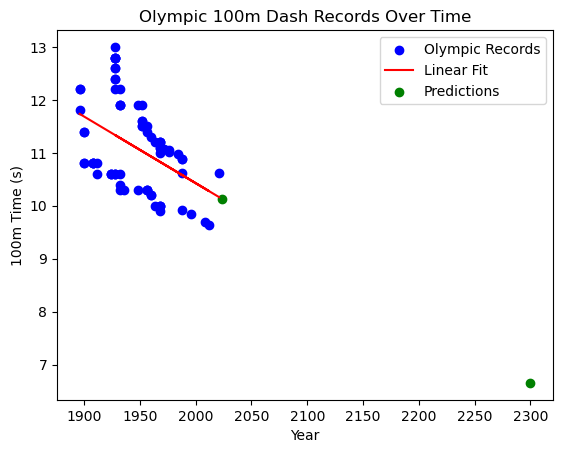

Predicted 100m time for 2024: 10.13s
Predicted 100m time for 2300: 6.65s


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')

# Inspect first rows
print(df.head())

# Use 'Games' column as Year (avoids issues with Date parsing)
df = df.dropna(subset=['Games', 'Time'])
X = df['Games'].values.reshape(-1, 1)
y = df['Time'].values

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict for 2024 and 2300
years_to_predict = np.array([2024, 2300]).reshape(-1, 1)
predictions = model.predict(years_to_predict)

# Plot results
plt.scatter(X, y, color='blue', label='Olympic Records')
plt.plot(X, model.predict(X), color='red', label='Linear Fit')
plt.scatter(years_to_predict, predictions, color='green', label='Predictions')
plt.xlabel('Year')
plt.ylabel('100m Time (s)')
plt.title('Olympic 100m Dash Records Over Time')
plt.legend()
plt.show()

# Print predictions
print(f"Predicted 100m time for 2024: {predictions[0]:.2f}s")
print(f"Predicted 100m time for 2300: {predictions[1]:.2f}s")


I used linear regression to model Olympic 100m dash times because the records generally decrease over the years. The plot shows actual records as blue dots, the linear fit as a red line, and predictions for 2024 and 2300 as green dots. The model predicts about 10.13 s for 2024, which is reasonable, but 6.65 s for 2300, which is unrealistic due to human limits. Linear regression works for short-term predictions but fails for long-term forecasts, where a logistic model would be more appropriate